# HRRR

This tutorial shows you how to download HRRR data from Amazon (and other sources) with the Herbie Python package.


**Data Sources**

|`prioriy=`|Data source| Archive Duration|
|--|--|--|
|`"aws"` | [Amazon Web Services](https://registry.opendata.aws/noaa-hrrr-pds/) | 2014-07-30 to present
|`"nomads"` | [NOMADS](https://nomads.ncep.noaa.gov/pub/data/nccf/com/hrrr/prod/) | Yesterday and today
|`"google"` | [Google Cloud Platform ](https://console.cloud.google.com/marketplace/product/noaa-public/hrrr?project=python-232920) | 2014-07-30 to present
|`"azure"` | [Microsoft Azure](https://github.com/microsoft/AIforEarthDataSets/blob/main/data/noaa-hrrr.md) | 2021-03-21 to present
|`"pando"` | [University of Utah Pando archive](https://home.chpc.utah.edu/~u0553130/Brian_Blaylock/cgi-bin/hrrr_download.cgi) | varies

**Model Initialization**

Model cyles every hour.

**Forecast Hour**

For the most recent version of HRRR...

|`fxx=`|Forecast lead time|
|--|--|
|`0` through `48`, step=1| available for runs initialized at 00z, 06z, 12z, 18z
|`0` through `18`, step=1| available for runs initialized at all other hours.

**Products**

|`product=`| Product Description |    
|--|--|
|`"sfc"` | surface fields|
|`"prs"` | pressure levels|
|`"nat"` | native levels|
|`"subh"`| subhourly products|





In [1]:
from herbie import Herbie
from toolbox import EasyMap, pc
from paint.standard2 import cm_tmp

import matplotlib.pyplot as plt
import cartopy.crs as ccrs

In [2]:
H = Herbie(
    "2021-07-19",
    model="hrrr",
    product="sfc",
    fxx=0,
)

✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2021-Jul-19 00:00 UTC F00 ┊ GRIB2 @ aws ┊ IDX @ aws


In [5]:
# Show available products
H.PRODUCTS

{'sfc': '2D surface level fields; 3-km resolution',
 'prs': '3D pressure level fields; 3-km resolution',
 'nat': 'Native level fields; 3-km resolution',
 'subh': 'Subhourly grids; 3-km resolution'}

In [3]:
ds = H.xarray("TMP:2 m above")
ds

<xarray.Dataset>
Dimensions:              (y: 1059, x: 1799)
Coordinates:
    time                 datetime64[ns] 2021-07-19
    step                 timedelta64[ns] 00:00:00
    heightAboveGround    float64 2.0
    latitude             (y, x) float64 ...
    longitude            (y, x) float64 ...
    valid_time           datetime64[ns] ...
Dimensions without coordinates: y, x
Data variables:
    t2m                  (y, x) float32 ...
    gribfile_projection  object None
Attributes:
    GRIB_edition:            2
    GRIB_centre:             kwbc
    GRIB_centreDescription:  US National Weather Service - NCEP
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             US National Weather Service - NCEP
    model:                   hrrr
    product:                 sfc
    description:             High-Resolution Rapid Refresh - CONUS
    remote_grib:             https://noaa-hrrr-bdp-pds.s3.amazonaws.com/hrrr....
    local_grib:              C:\Users\blaylock\data\hrrr\20210719\subset_6eef...
    search:            TMP:2 m above

Text(1.0, 1.0, '2 metre temperature')

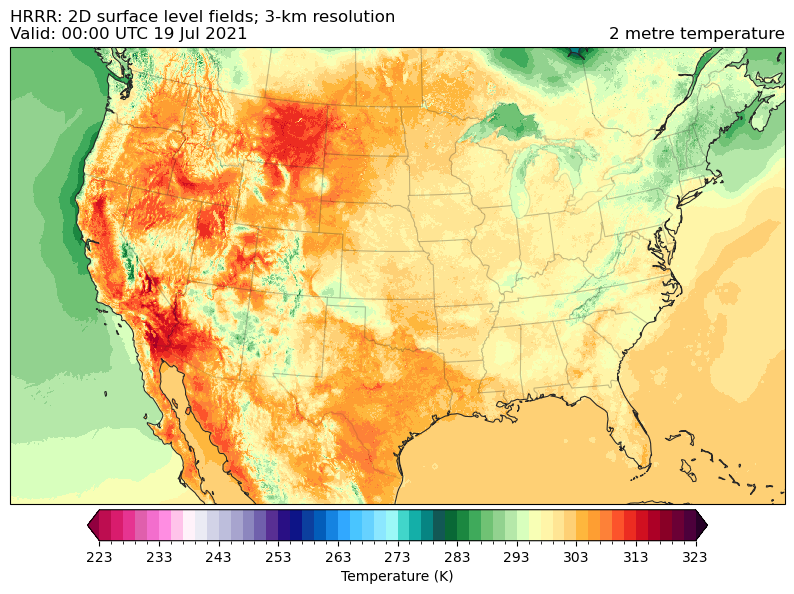

In [4]:
ax = EasyMap("50m", crs=ds.herbie.crs, figsize=[10, 8]).STATES().ax

p = ax.pcolormesh(
    ds.longitude,
    ds.latitude,
    ds.t2m,
    transform=pc,
    **cm_tmp(units="K").cmap_kwargs,
)
plt.colorbar(
    p,
    ax=ax,
    orientation="horizontal",
    pad=0.01,
    shrink=0.8,
    **cm_tmp(units="K").cbar_kwargs,
)

ax.set_title(
    f"{ds.model.upper()}: {H.product_description}\nValid: {ds.valid_time.dt.strftime('%H:%M UTC %d %b %Y').item()}",
    loc="left",
)
ax.set_title(ds.t2m.GRIB_name, loc="right")